# 🚀 **FoodMed AI**
### *AI that understands what you eat + what you say + predicts your health risk*

**Domain:** HealthTech + FoodTech  
**Tech:** Computer Vision (MobileNetV2), NLP (TF-IDF), ML (Random Forest)

---

### 🔹 Step 0 — Install & Setup

In [1]:
!pip install tensorflow scikit-learn pandas matplotlib seaborn nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 🔹 Step 1 — Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

---
##  1. COMPUTER VISION MODULE (Food Detection)

### 🔹 Step 2 — Upload Food Image

Saving WhatsApp Image 2026-02-22 at 17.56.35.jpeg to WhatsApp Image 2026-02-22 at 17.56.35.jpeg


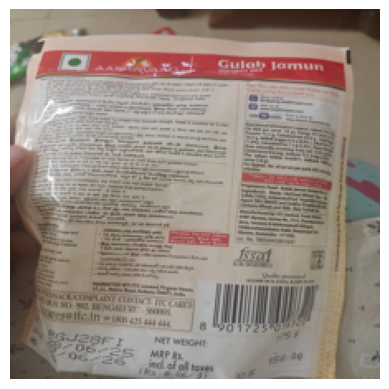

In [3]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = Image.open(image_path).resize((224,224))
plt.imshow(img)
plt.axis('off')
plt.show()

### 🔹 Step 3 — Food Recognition Model

In [4]:
model = tf.keras.applications.MobileNetV2(weights='imagenet')
img_array = np.array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)
decoded = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=1)
food_detected = decoded[0][0][1]

print("Detected Item:", food_detected)

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Detected Item: hard_disc


### 🔹 Step 4 — Nutrition Mapping

In [5]:
nutrition_db = {
    "pizza": [60, 25, 5],
    "burger": [50, 30, 6],
    "ice_cream": [45, 20, 30],
    "salad": [5, 1, 2],
    "rice": [80, 1, 0]
}

def map_food(food_name):
    food_name = food_name.lower()
    for key in nutrition_db:
        if key in food_name:
            return nutrition_db[key]
    return [20, 10, 5]

carbs, fat, sugar = map_food(food_detected)
print(f"Estimated Intake -> Carbs: {carbs}, Fat: {fat}, Sugar: {sugar}")

Estimated Intake -> Carbs: 20, Fat: 10, Sugar: 5


---
##  2. NLP MODULE (Lifestyle Sentiment)

### 🔹 Step 5 — User Lifestyle Input

In [6]:
text_input = input("Describe your eating lifestyle: ")

sample_texts = [
    "I eat sweets daily and feel very tired",
    "I follow a strict healthy diet and exercise",
    "I avoid junk food and sugary drinks",
    "I eat outside frequently and love fried food",
    "I feel energetic and eat balanced meals"
]

vectorizer = TfidfVectorizer()
vectorizer.fit(sample_texts)

text_vec = vectorizer.transform([text_input]).toarray()
lifestyle_score = text_vec.sum()
print("Lifestyle AI Signal Score:", round(lifestyle_score, 4))

Describe your eating lifestyle: sedentary 
Lifestyle AI Signal Score: 0.0


---
## 3. ML RISK MODEL (Predictive Analytics)

### 🔹 Step 6 — Train Multimodal Risk Model

In [7]:
try:
    df = pd.read_csv('health_data.csv')
except:
    data = {
        "carbs": [70, 20, 90, 30, 60, 85, 55, 30],
        "fat": [30, 5, 40, 10, 20, 35, 15, 8],
        "sugar": [20, 2, 35, 5, 15, 25, 10, 4],
        "lifestyle": [2.5, 0.5, 3.0, 1.0, 2.0, 2.8, 0.8, 0.4],
        "risk": [1, 0, 1, 0, 1, 1, 0, 0]
    }
    df = pd.DataFrame(data)

X = df[["carbs", "fat", "sugar", "lifestyle"]]
y = df["risk"]

risk_model = RandomForestClassifier(n_estimators=100)
risk_model.fit(X, y)
print("Model trained.")

Model trained.


### 🔹 Step 7 — Final Multimodal Prediction

In [8]:
final_features = [[carbs, fat, sugar, lifestyle_score]]
prediction = risk_model.predict(final_features)
probability = risk_model.predict_proba(final_features)[0][1]

print(f"\n--- RESULTS ---")
print(f"Detected Food: {food_detected}")
print(f"Risk Probability: {round(probability * 100, 2)}%")

if prediction[0] == 1:
    print("⚠️ PREDICTION: HIGH FUTURE HEALTH RISK")
else:
    print("✅ PREDICTION: LOW FUTURE HEALTH RISK")


--- RESULTS ---
Detected Food: hard_disc
Risk Probability: 1.0%
✅ PREDICTION: LOW FUTURE HEALTH RISK


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


---
## 📊 4. VISUALIZATION MODULE

### 🔹 Step 8 — Visualize Results (Graphs)

/tmp/ipython-input-4238796778.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, ax=ax1, palette="magma")


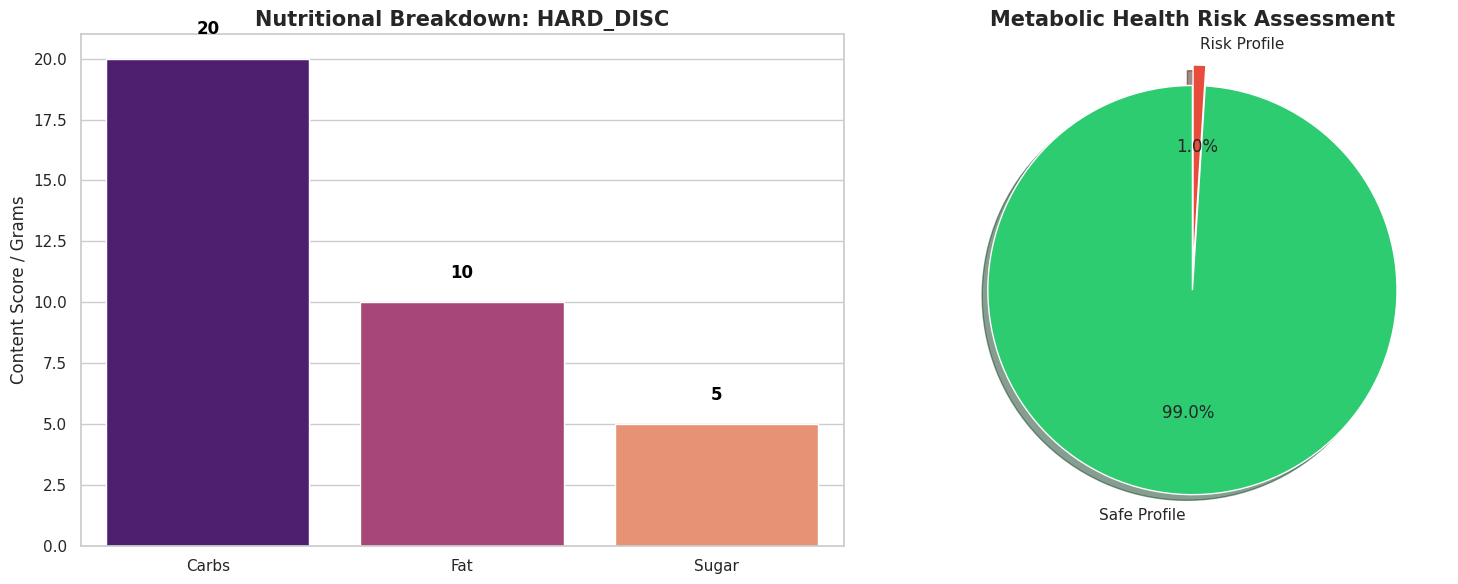

In [9]:
# Set visual style
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graph 1: Nutritional Content Comparison
labels = ['Carbs', 'Fat', 'Sugar']
values = [carbs, fat, sugar]
sns.barplot(x=labels, y=values, ax=ax1, palette="magma")
ax1.set_title(f'Nutritional Breakdown: {food_detected.upper()}', fontsize=15, fontweight='bold')
ax1.set_ylabel('Content Score / Grams')
for i, v in enumerate(values):
    ax1.text(i, v + 1, str(v), color='black', ha='center', fontweight='bold')

# Graph 2: Risk Probability Gauge (Pie Chart)
risk_data = [1 - probability, probability]
risk_labels = ['Safe Profile', 'Risk Profile']
colors = ['#2ecc71', '#e74c3c']

ax2.pie(risk_data, labels=risk_labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1), shadow=True)
ax2.set_title('Metabolic Health Risk Assessment', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()